<a href="https://colab.research.google.com/github/ContextLab/cs-for-psych/blob/master/slides/module_4/bob_ross_libraries_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Painting with Bob Ross!

Let's learn about some useful Python libraries by applying them to [Bob Ross](https://en.wikipedia.org/wiki/Bob_Ross)'s paintings.


![Bob Ross](https://upload.wikimedia.org/wikipedia/en/7/70/Bob_at_Easel.jpg)

First, let's import our libraries:
  - numpy: introduces the `array` datatype, good for representing and manipulating matrices
  - pandas: introduces the `DataFrame` object-- a wrapper for arrays that provides labels for rows and columns
  - matplotlib: basic plotting library (lots of overlap with MATLAB plotting features, similar syntax)
  - seaborn: wrapper for matplotlib that makes plots look nicer, also adds some useful functionality
  - hypertools: wrapper for seaborn, pandas, and scikit-learn (machine learning library) that provides some useful tools for visualizing and manipulating arrays and DataFrames

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

#hypertools isn't included in the default colaboratory installation
#this block tries to import hypertools, and if that fails we install
#the library and try to import it again
try:
  import hypertools as hyp
except ModuleNotFoundError:
  !pip install --quiet git+https://github.com/ContextLab/hypertools.git
  import hypertools as hyp

# Exploring Bob Ross's paintings

Inspired by [this article](https://fivethirtyeight.com/features/a-statistical-analysis-of-the-work-of-bob-ross/), we'll take a dive into Bob Ross's paintings using two datasets:
- `painting_features`: titles and attributes of the paintings featured in each of Bob Ross's episodes
- `paintings`: links to an image of each painting, a youtube recording of each painting's associated episode, plus some information about the colors used in each painting

We'll load both datasets using the `read_csv` function:

In [2]:
painting_features = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')
paintings = pd.read_csv('https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/bob_ross_paintings.csv')

The `head` function in Pandas prints out the first few rows of a DataFrame; this is a great way to "get acquainted" with a new dataset:

In [3]:
painting_features.head() #by default, the first 5 rows are displayed

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,GUEST,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STEVE_ROSS,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [4]:
paintings.head(3) #we can adjust how many rows are printed by passing an argument to the head function

,Unnamed: 0,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,Bright_Red,Burnt_Umber,Cadmium_Yellow,Dark_Sienna,Indian_Red,Indian_Yellow,Liquid_Black,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,1,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1
1,2,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1
2,3,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",1,1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1


Next, let's define some functions to display painting images and YouTube videos:

In [8]:
import os
import urllib.request as get
from IPython.lib.display import YouTubeVideo

# display a painting, given its url
# note: use return_image=True to get the image data
# as an n_rows by n_columns by n_colors numpy array
def imshow(url, *args, **kwargs):
  img = mpl.pyplot.imread(get.urlopen(url))

  if 'return_img' in kwargs.keys() and kwargs['return_img']:
    return img
  kwargs.pop('return_img', None)

  return mpl.pyplot.imshow(img, *args, **kwargs)

#display a youtube video, given its url
def youtube(url):
  id = os.path.split(url)[-1]
  return YouTubeVideo(id)

Let's plot an example painting along with its video:

Displaying the image and YouTube video for painting #383 (Misty Foothills):


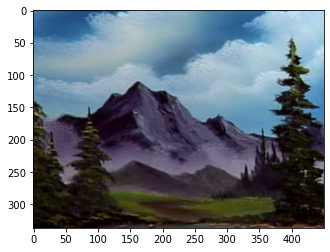

In [19]:
p = np.random.randint(paintings.shape[0]) #pick any number between 0 and paintings.shape[0] - 1, inclusive

print(f'Displaying the image and YouTube video for painting #{p + 1} ({paintings.iloc[p]["painting_title"]}):')
imshow(paintings.iloc[p]['img_src']);

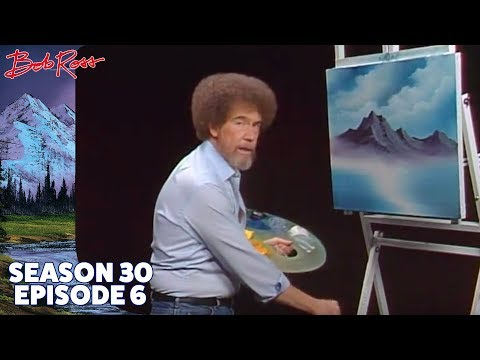

In [20]:
youtube(paintings.iloc[p]['youtube_src'])

We can also get the image data directly (rather than displaying it) using the `return_img` argument:

In [21]:
x = imshow(paintings.iloc[p]['img_src'], return_img=True)
print(f'x is of type {type(x)} and it\'s shape is {x.shape}')

x is of type <class 'numpy.ndarray'> and it's shape is (337, 450, 3)


Sometimes it can be useful to reshape an image to (or from) a column (or row) vector.  Numpy's `ravel` function makes this easy:

x.ravel() has shape (454950,) and x_recovered has shape (337, 450, 3).  Here's what x_recovered looks like:


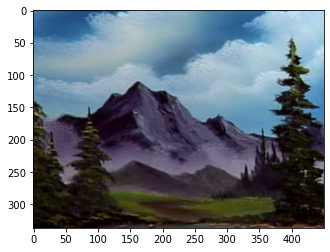

In [22]:
x_vec = x.ravel()
x_recovered = x_vec.reshape(x.shape)
print(f'x.ravel() has shape {x_vec.shape} and x_recovered has shape {x_recovered.shape}.  Here\'s what x_recovered looks like:')
mpl.pyplot.imshow(x_recovered); #see what happens when you include vs. exclude the semicolon here...

Finally, let's do a quick clustering analysis of the paintings based on their features.  First, we can plot a heatmap of the features using `seaborn`.  We'll exclude the first two columns, since they can't easily be vectorized. :

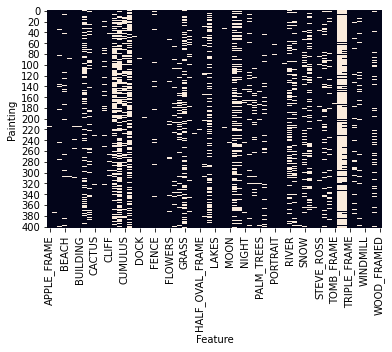

In [ ]:
ax = sns.heatmap(painting_features[painting_features.columns[2:]], cbar=False);
ax.set_ylabel('Painting');
ax.set_xlabel('Feature');

Next let's use hypertools to cluster the paintings:

/usr/local/lib/python3.6/dist-packages/hypertools/plot/plot.py:509: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  kwargs[kwarg]=np.array(kwargs[kwarg])


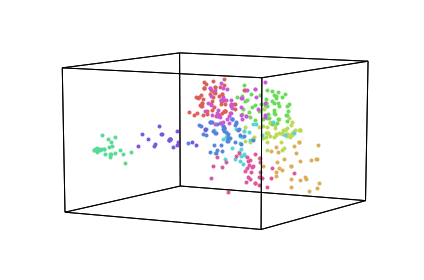

In [27]:
hyp.plot(painting_features, '.', cluster='KMeans', n_clusters=10);

## Some things to explore:

- What are the most common combinations of features in the paintings?
- What proportion of the paintings contain:
  - At least one type of tree
  - At least two types of trees
  - One or more deciduous trees
  - One or more coniferous trees
  - Clouds
  - Some sort of man-made structure
  - Daytime (versus nighttime)
- Which colors are most common?
  - Can you create a visualization of the colors?  E.g.:
    - Modify `imshow` to also display the dominant paint colors in some nice-looking way alongside the image of the painting.  (Hint: check out `matplotlib.pyplot.subplots`)
    - Can you create a bar chart showing the proportions of paintings that use each color?  You could color each bar using the associated color.
    - Can you write a function to try to estimate the proportion of each color reflected in each individual *painting*?
- Are there any interesting clusters, patterns, or interactions between which colors are used versus which features are in the paintings?
- Can you cluster paintings by the images themselves (instead of their features)?  What do you see and what do you think it means?
  - Hint: use list comprehensions to get the "raveled" image for each painting, and then use `numpy.vstack` to turn them into a number-of-paintings by (number-of-pixels * number-of-color-channels) numpy array.  Then pass the array to hypertools to project the result into 3D and create a plot.

Try to come up with something interesting to try out or say about this dataset and share it with the class when we reconvene.